In [73]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import rv_discrete

In [273]:
def make_clusters(
        n: int = 500,
        m: int = 2,
        k: int = 3,
        bounds: tuple = (-10, 10),
        scale: float = 1,
        seed: int = 42) -> (np.ndarray, np.ndarray):
    """
    creates some clustered data

    inputs:
        n: int
            number of observations
        m: int
            number of features
        k: int
            number of clusters
        bounds: tuple
            minimum and maximum bounds for cluster grid
        scale: float
            standard deviation of normal distribution
        seed: int
            random seed

    outputs:
        (np.ndarray, np.ndarray)
            returns a 2D matrix of `n` observations and `m` features that are clustered into `k` groups
            returns a 1D array of `n` size that defines the cluster origin for each observation
    """
    np.random.seed(seed)
    assert k <= n

    labels = np.sort(np.random.randint(0, k, size=n))
    centers = np.random.uniform(bounds[0], bounds[1], size=(k,m))
    mat = np.vstack([
        np.random.normal(
            loc=centers[idx],
            scale=scale,
            size=(np.sum(labels==idx), m))
        for idx in np.arange(0, k)])

    return mat, labels

In [274]:
mat, labels = make_clusters(10, 2, 3, (-10, 10), 1, 42)

In [275]:
print(mat)

[[ -9.30780214   7.86608296]
 [ -9.30174545   6.85779316]
 [ -8.59636549   5.41024267]
 [  0.2973824    3.59916403]
 [-10.60114123   9.71244438]
 [-10.49633419   7.98589334]
 [ -8.12266135   9.17242074]
 [ -9.52078191   7.97344886]
 [-10.13269284   9.50911963]
 [-10.73930369   9.77389506]]


In [276]:
# Initialize an empty set of centroids
centroids = set()
type(centroids)

set

In [277]:

# Generate random x coordinate for initial centroid within range of data points
random_centroid_x = np.random.uniform(low=np.min(mat[:, 0]), high=np.max(mat[:, 0]))

# Generate random y coordinate for initial centroid within range of data points
random_centroid_y = np.random.uniform(low=np.min(mat[:, 1]), high=np.max(mat[:, 1]))

print(random_centroid_x)
print(random_centroid_y)

-10.021349679822348
9.458277002131187


In [278]:
random_centroid_tuple = (random_centroid_x, random_centroid_y)
type(random_centroid_tuple)

tuple

In [279]:
# Create a 2D array with
random_centroid_arr = []
random_centroid_arr.append([random_centroid_x, random_centroid_y])
print(random_centroid_arr)

[[-10.021349679822348, 9.458277002131187]]


In [280]:
# Add the random centroid coordinates to the centroid set
centroids.add(random_centroid_tuple)

# Calculate the Euclidean distance between the random centroid and the rest of the points
dist = cdist(random_centroid_arr, mat, 'euclidean')

# Square the distances between the random centroid and the rest of the points
square_dist = np.square(dist)

# Sum the squared the distances
sum_dist = np.sum(square_dist)

# Divide each element in the squared distances array by the sum of all the squared distances
prob_dist = square_dist / sum_dist

print(prob_dist)

[[1.69961028e-02 4.06465469e-02 1.02823958e-01 7.86123959e-01
  2.23745969e-03 1.33631666e-02 2.05832089e-02 1.37079691e-02
  8.36467920e-05 3.43398249e-03]]


In [281]:
print(np.sum(prob_dist))

1.0


In [282]:
cumprobs = prob_dist.cumsum()
print(cumprobs)

[0.0169961  0.05764265 0.16046661 0.94659057 0.94882803 0.96219119
 0.9827744  0.99648237 0.99656602 1.        ]


In [283]:
r = np.random.random()
print(r)

0.9656320330745594


In [287]:
ind = np.where(cumprobs >= r)
print(ind)

(array([6, 7, 8, 9]),)


In [288]:
print(mat[ind])

[[ -8.12266135   9.17242074]
 [ -9.52078191   7.97344886]
 [-10.13269284   9.50911963]
 [-10.73930369   9.77389506]]


In [289]:
print(mat)

[[ -9.30780214   7.86608296]
 [ -9.30174545   6.85779316]
 [ -8.59636549   5.41024267]
 [  0.2973824    3.59916403]
 [-10.60114123   9.71244438]
 [-10.49633419   7.98589334]
 [ -8.12266135   9.17242074]
 [ -9.52078191   7.97344886]
 [-10.13269284   9.50911963]
 [-10.73930369   9.77389506]]


In [255]:
from scipy.stats import norm
print(norm.pdf(mat))

[[6.14213845e-20 1.46173226e-14]
 [6.49822540e-20 2.44692948e-11]
 [3.58320722e-17 1.75732759e-07]
 [3.81686121e-01 6.13746011e-04]
 [1.57395421e-25 1.30938890e-21]
 [4.75488772e-25 5.65529134e-15]
 [1.87953461e-15 2.14583143e-19]
 [8.27057749e-21 6.24570810e-15]
 [2.02341469e-23 9.24118684e-21]
 [3.60366721e-26 7.19525064e-22]]


In [264]:
print(norm.cdf(mat))

[[6.52524139e-21 1.00000000e+00]
 [6.90793530e-21 1.00000000e+00]
 [4.11402345e-18 9.99999969e-01]
 [6.16912711e-01 9.99840379e-01]
 [1.47182953e-26 1.00000000e+00]
 [4.49000029e-26 1.00000000e+00]
 [2.28035299e-16 1.00000000e+00]
 [8.59404335e-22 1.00000000e+00]
 [1.97800982e-24 1.00000000e+00]
 [3.32721838e-27 1.00000000e+00]]


ValueError: x and y must have same first dimension, but have shapes (11,) and (10, 2)

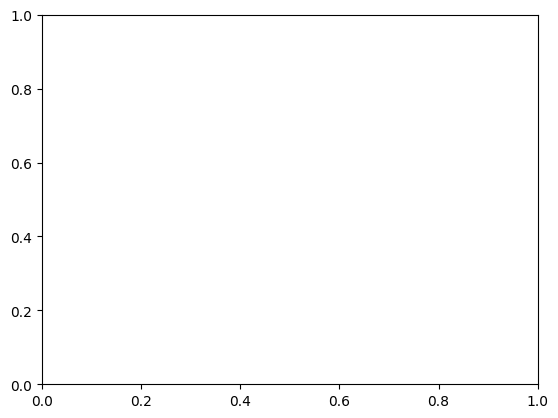

In [263]:
import matplotlib.pyplot as plt
count, bins_count = np.histogram(mat, bins=10)
plt.plot(bins_count, norm.pdf(mat), color="red", label="PDF")
plt.plot(bins_count, norm.cdf(mat), label="CDF")
plt.legend()

In [227]:
practice_array = np.array([0.2,0.1,0.4,0.3])

In [229]:
cumprobs_practice = practice_array.cumsum()
print(cumprobs_practice)
r = np.random.uniform()
print(r)
index = np.where(cumprobs_practice >= r)[0][0]
print(ind)
print(practice_array[index])

[0.2 0.3 0.7 1. ]
0.7751328233611146
3
0.3


ValueError: a must be 1-dimensional